## Exploratory Data Analysis (EDA)
This notebook is designed to guide you through the basics of EDA using the Titanic dataset from Kaggle. Each section defines key concepts and shows concise code examples in sequence.

### 1. Dataset

On Kaggle, search for *Machine Learning from Disaster*. Open the Titanic repo that shows up and navigate to the data section, from where you can download a classic, well‑documented data set labelled as `train.csv`. Place this file in your working directory.

### 2. Key Terminologies

* Dataset: Structured data (table of rows & columns)

* DataFrame: A 2D pandas object.

* Series: A single column of a data.

* Feature: An input variable (column) used for analysis or modelling.

* Target: The variable to predict (e.g., "Survived").

### 3. Loading Data

In [62]:
import pandas as pd
df = pd.read_csv('train.csv') # file type can be excel so, pd.read_excel works

### 4. Inspecting Data

In [74]:
# top rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# bottom rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [78]:
# structure & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
# summary statistics for numerical columns mainly
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

### 5. Renaming & Handling Missing Values

In [98]:
# renaming columns for clarity
df.rename(columns={'Survival_Status':'Survived', 'Fares':'Fare'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   TicketClass  891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
# counting missing values
df.isnull().sum()

PassengerId      0
Survived         0
TicketClass      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
df['Embarked'].isnull().sum()

2

In [114]:
# droping rows missing 'Age'
df.dropna(subset=['Age'], inplace=True)

In [116]:
len(df)

714

In [118]:
df['Embarked'].isnull().sum()

2

In [120]:
# filling missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [122]:
df['Embarked'].isnull().sum()

0

### 6. Indexing, Slicing & Selecting

In [128]:
# select by label (rows 0–4, columns by name)
df.loc[0:3, ['Name','Age','Survived']]

,Name,Age,Survived
0,"Braund, Mr. Owen Harris",22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1


In [126]:
# select by position (first 3 rows, first 2 columns)
df.iloc[0:3, 0:2]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1


In [130]:
# filtering: survived passengers
df[df['Survived'] == 1]

,PassengerId,Survived,TicketClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# selecting a Series
deck = df['Cabin']

In [138]:
# Filter: female adults (>18)
adults_female = df[(df['Sex']=='female') & (df['Age']>18)].reset_index(drop=True)
adults_female

,PassengerId,Survived,TicketClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
188,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
189,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
190,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
191,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


### 7. Common EDA Functions

In [142]:
# value counts
df['TicketClass'].value_counts()

TicketClass
3    355
1    186
2    173
Name: count, dtype: int64

In [144]:
# correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.corr())

             PassengerId  Survived  TicketClass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029340    -0.035349  0.036847 -0.082398 -0.011617   
Survived        0.029340  1.000000    -0.359653 -0.077221 -0.017358  0.093317   
TicketClass    -0.035349 -0.359653     1.000000 -0.369226  0.067247  0.025683   
Age             0.036847 -0.077221    -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.082398 -0.017358     0.067247 -0.308247  1.000000  0.383820   
Parch          -0.011617  0.093317     0.025683 -0.189119  0.383820  1.000000   
Fare            0.009592  0.268189    -0.554182  0.096067  0.138329  0.205119   

                 Fare  
PassengerId  0.009592  
Survived     0.268189  
TicketClass -0.554182  
Age          0.096067  
SibSp        0.138329  
Parch        0.205119  
Fare         1.000000  


### 8. Basic Visualizations

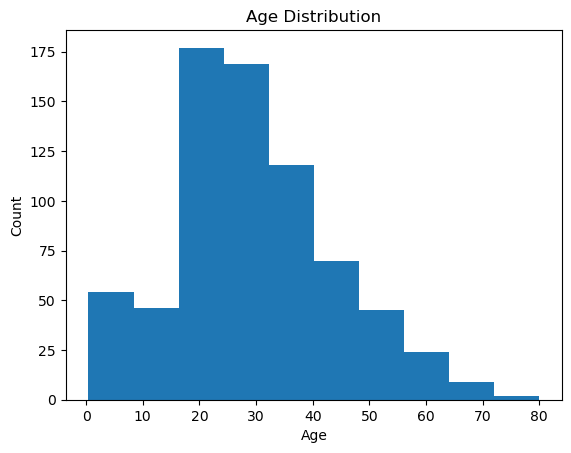

In [148]:
import matplotlib.pyplot as plt

# histogram of age
plt.hist(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

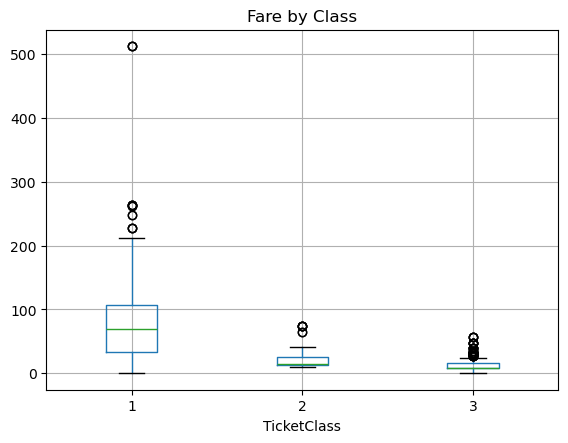

In [150]:
# boxplot: fare by passenger class
df.boxplot(column='Fare', by='TicketClass')
plt.title('Fare by Class')
plt.suptitle('')
plt.show()

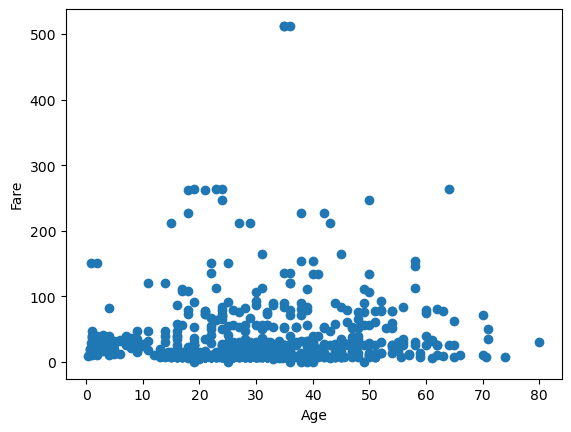

In [152]:
# scatter: Age vs. Fare
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## TBC...